# Predicting heart disease using machine learning

THis notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data comes from UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/45/heart+disease

It also has a version present on Kaggle https://www.kaggle.com/c/heart-disease-uci/data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during proof of concept, we'll pursue the model


## Features

* age. The age of the patient.
* sex. The gender of the patient. (1 = male, 0 = female).
* cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
* trestbps. Resting blood pressure in mmHg.
* chol. Serum Cholestero in mg/dl.
* fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* thalach. Max heart rate achieved.
* exang. Exercise induced angina (1 = yes, 0 = no).
* oldpeak. ST depression induced by exercise relative to rest.
* slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
* ca. Number of major vessels (0–3) colored by flourosopy.
* thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

### Preparing the tools

In [1]:
import seaborn as sn

In [2]:
# EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# so that graphs appear inside the notebook
%matplotlib inline

# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [3]:
df = pd.read_csv("./data/heart-disease_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### EDA (Exploratory Data Analysis)

In [4]:
df.shape

(303, 14)

In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

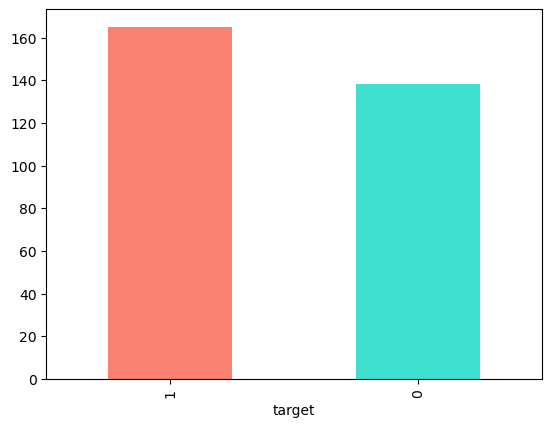

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "turquoise"])

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing Different columns with each other to find insights about the data
and how they relate to the target data

In [10]:
df.sex.value_counts() # 1 = Male, 0 = Female

sex
1    207
0     96
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

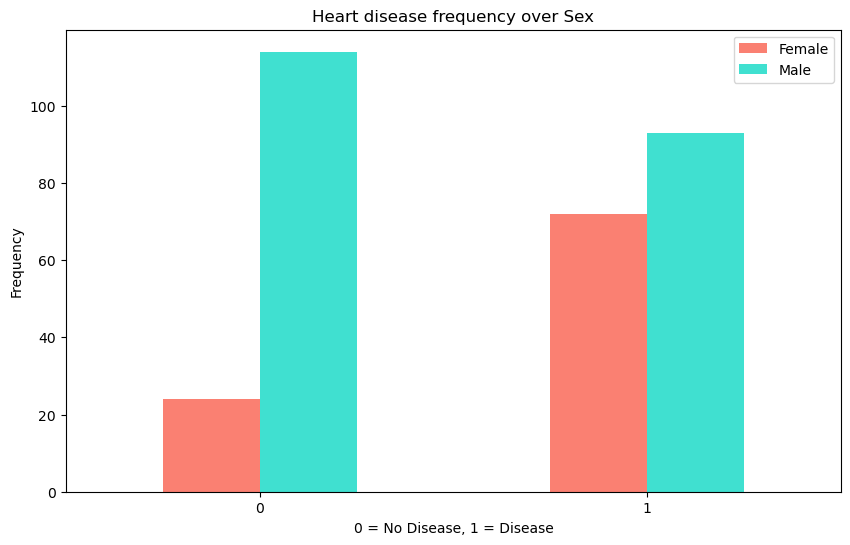

In [11]:
pd.crosstab(df.target, df.sex).plot(
    kind="bar",
    color=["salmon", "turquoise"], 
    figsize=(10,6)
)
plt.title("Heart disease frequency over Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Frequency")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

In [12]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

Text(0.5, 0, 'Age')

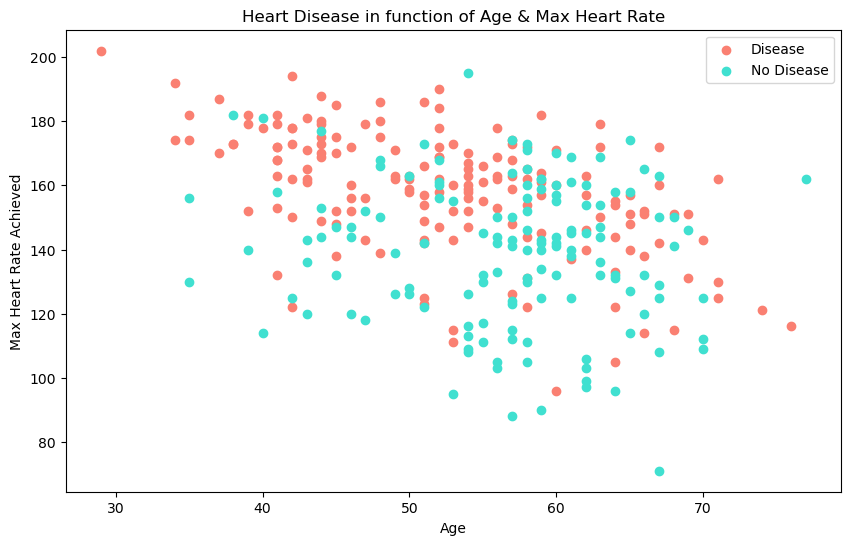

In [13]:
# create two graphs within a figure one comparing Age, thalach to the +ve target and other with -ve target

plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color=["salmon"])
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color=["turquoise"])

plt.title("Heart Disease in function of Age & Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate Achieved")
plt.xlabel("Age")

<Axes: ylabel='Frequency'>

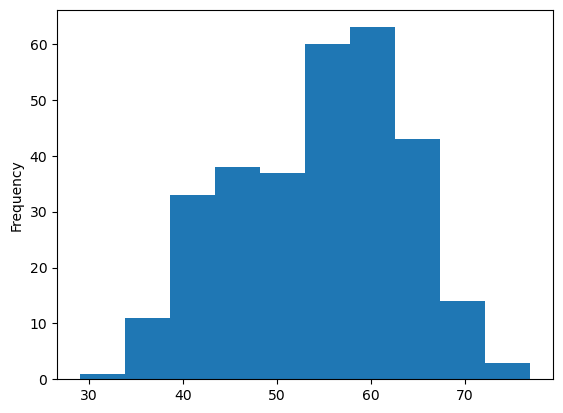

In [14]:
df.age.plot.hist()

### Heart Disease frequency per chest pain type

* cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).

In [15]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


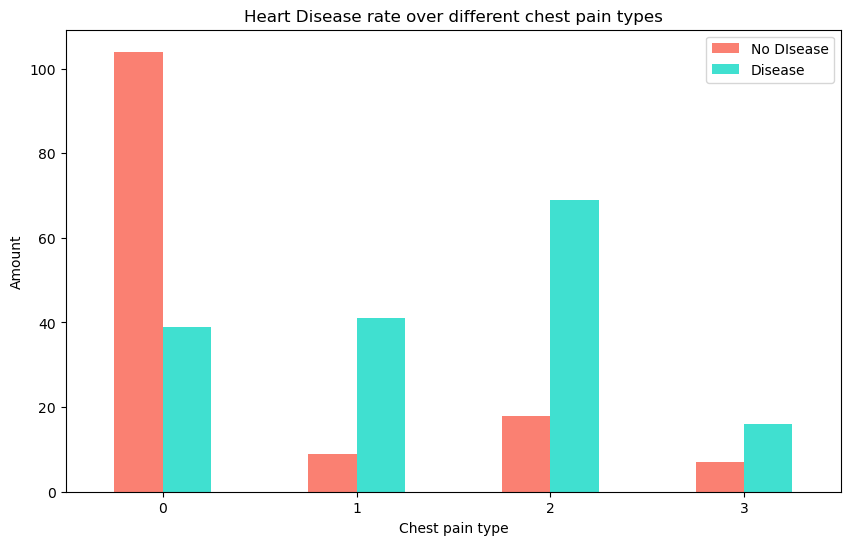

In [18]:
pd.crosstab(df.cp, df.target).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "turquoise"]
)
plt.title("Heart Disease rate over different chest pain types")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["No DIsease", "Disease"])

### Correlation b/w features and the target variable

This can give us insights about the relationship between columns among themselves and to the target column

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


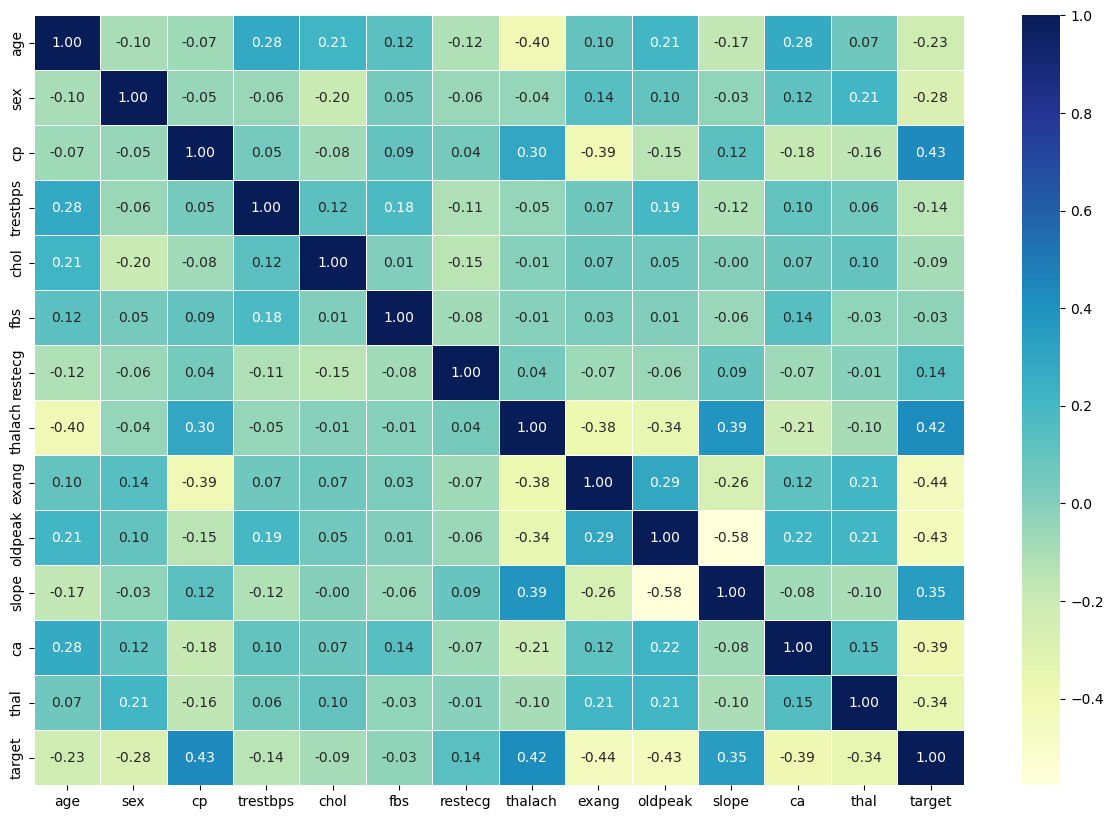

In [24]:
corr_matric = df.corr()
fig, ax =plt.subplots(
    figsize = (15, 10)
)

ax = sn.heatmap(
    corr_matric,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu"
)

## 5. Modelling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = df.drop(["target"], axis=1)
y= df["target"]

X.shape, y.shape

((303, 13), (303,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2
)

(
    X_train.shape,
    X_test.shape,
    y_train.shape,
    y_test.shape,
)

((242, 13), (61, 13), (242,), (61,))

Now after splitting our data into train and test splits, we will use some machine learning models to find patterns in our data.

we will be using the following models:
1. Logistic Regression
2. Random Forest Classifier
3. K-Nearest Neighbors Classifier

In [31]:
type (y_train)

pandas.core.series.Series

In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score_model(models, X_train, X_test, y_train, y_test):
    """fit multiple models and return scores of each in a dictionary

    Args:
        models (dictionary): a dictionary of various sklearn machine learning models
        X_train (data_frame): training data (no labels)
        X_test (data_frame): testing data (no labels)
        y_train (series): training labels
        y_test (series): testing labels
    """
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [34]:
scores = fit_and_score_model(models, X_train, X_test, y_train, y_test)

e:\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8688524590163934}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

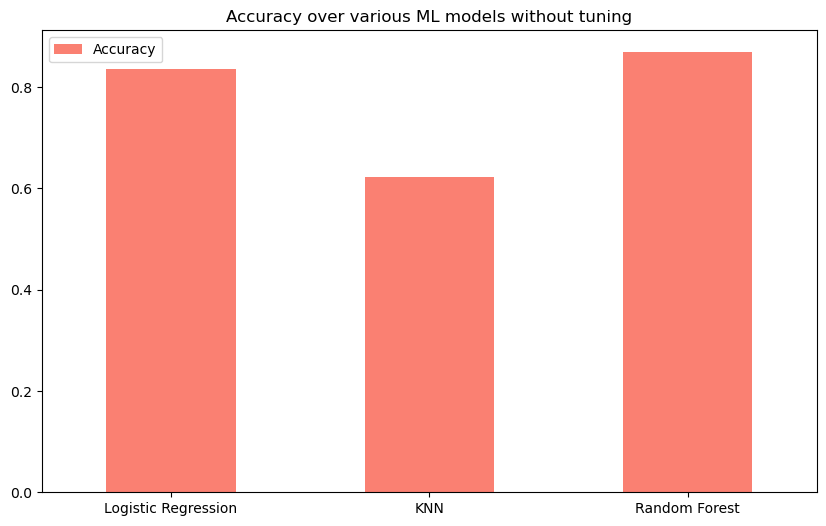

In [46]:
pd.DataFrame(
    scores.values(),
    scores.keys(),
    columns=["Accuracy"]
).plot.bar(figsize=(10, 6), color=["salmon"])
plt.title("Accuracy over various ML models without tuning")
plt.xticks(rotation=0)

### Hyperparameter tuning for KNN (by hand)

In [50]:
neighbors = range(1, 21)

test_scores = []
train_scores = []

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [51]:
test_scores

[0.5409836065573771,
 0.6065573770491803,
 0.5901639344262295,
 0.6065573770491803,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.6229508196721312,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344]

In [52]:
train_scores

[1.0,
 0.8223140495867769,
 0.7727272727272727,
 0.7768595041322314,
 0.7520661157024794,
 0.7727272727272727,
 0.7355371900826446,
 0.7355371900826446,
 0.7024793388429752,
 0.7107438016528925,
 0.7066115702479339,
 0.6859504132231405,
 0.6900826446280992,
 0.6776859504132231,
 0.6859504132231405,
 0.6818181818181818,
 0.6776859504132231,
 0.6818181818181818,
 0.6735537190082644,
 0.6900826446280992]

Maximum test Score: 68.85% & Maximum train score: 100.00%


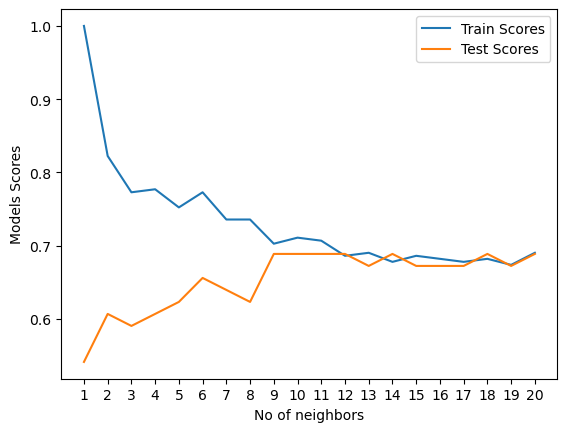

In [60]:
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xlabel("No of neighbors")
plt.ylabel("Models Scores")
plt.xticks(np.arange(1,21, 1))
plt.legend()
print(f"Maximum test Score: {max(test_scores)*100:.2f}% & Maximum train score: {max(train_scores)*100:.2f}%")

Since even after hyperparameter tuning KNN maximum score is 68% which is less that Random forest or Logistic Regression scores without tuning so we will drop KNN and explore the other two models.

### Hyperparameter tuning with RandomizedSearchCV

we are going to tune:

1. LogisticRegression
2. random forest classifier

... using RandomizedSearchCV

In [78]:
# hyper parameter grid for logistic regression
log_req_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

# hyper parameter grid for Random Forest Classifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [68]:
np.random.seed(42)

rs_reg = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_req_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [69]:
rs_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [70]:
rs_reg.score(X_test, y_test)

0.819672131147541

In [71]:
scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8688524590163934}

In [79]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=2
)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [80]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [81]:
rs_rf.score(X_test, y_test)

0.8852459016393442

In [82]:
scores

{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8688524590163934}

Here since Random Forest has improved performance after hyperparameter tuning than that of Logistic Regression, so we will further try tuning it using Grid Search CV